# Portfolio with the Maximum Sortino Ratio for the Auto Sector

## Auto Sector 

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-12-31"

# Establishing Assets
assets = ['MARUTI.NS', 'TATAMOTORS.NS', 'M&M.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS', 
         'HEROMOTOCO.NS', 'BALKRISIND.NS', 'BHARATFORG.NS', 'ASHOKLEY.NS']

#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

In [3]:
df.to_csv("auto.csv")

In [4]:
df = pd.read_csv("auto.csv", index_col=0)

In [5]:
df.head()

MARUTI.NS  TATAMOTORS.NS      M&M.NS  BAJAJ-AUTO.NS  \
Date                                                                
2017-01-02  5164.377441     487.049988  586.726929    2257.996826   
2017-01-03  5204.437988     481.100006  583.268066    2275.984619   
2017-01-04  5198.532715     486.649994  582.981689    2332.380127   
2017-01-05  5324.004883     502.149994  585.557983    2366.486572   
2017-01-06  5305.674805     497.750000  582.266052    2352.583496   

            EICHERMOT.NS  HEROMOTOCO.NS  BALKRISIND.NS  BHARATFORG.NS  \
Date                                                                    
2017-01-02   2021.341431    2555.635986     512.121338     444.055481   
2017-01-03   2019.254883    2518.531006     516.595154     442.902710   
2017-01-04   1991.955444    2534.006104     513.416504     438.891998   
2017-01-05   2003.428955    2590.379150     519.184998     443.022766   
2017-01-06   2038.733276    2586.837891     516.241699     438.099548   

            ASHOKLEY.NS  
Date                     
2017-01-02    69.582138  
2017-01-03    69.625099  
2017-01-04    72.030396  
2017-01-05    72.116302  
2017-01-06    73.276001

In [6]:
# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

MARUTI.NS  TATAMOTORS.NS    M&M.NS  BAJAJ-AUTO.NS  EICHERMOT.NS  \
Date                                                                          
2017-01-03   0.007727      -0.012292 -0.005913       0.007935     -0.001033   
2017-01-04  -0.001135       0.011470 -0.000491       0.024477     -0.013612   
2017-01-05   0.023849       0.031354  0.004409       0.014517      0.005743   
2017-01-06  -0.003449      -0.008801 -0.005638      -0.005892      0.017468   
2017-01-09   0.007619       0.004810 -0.013570       0.005819      0.012346   
...               ...            ...       ...            ...           ...   
2021-12-27  -0.003779       0.007563  0.007234       0.000650      0.000431   
2021-12-28   0.001090       0.019026  0.024319       0.006935      0.016852   
2021-12-29   0.007182      -0.008785 -0.007180       0.026855      0.032466   
2021-12-30  -0.009267      -0.011834 -0.004091      -0.019093     -0.002051   
2021-12-31   0.019608       0.025190  0.009421       0.015023      0.013556   

            HEROMOTOCO.NS  BALKRISIND.NS  BHARATFORG.NS  ASHOKLEY.NS  
Date                                                                  
2017-01-03      -0.014625       0.008698      -0.002599     0.000617  
2017-01-04       0.006126      -0.006172      -0.009097     0.033963  
2017-01-05       0.022003       0.011173       0.009368     0.001192  
2017-01-06      -0.001368      -0.005685      -0.011175     0.015953  
2017-01-09      -0.011838      -0.006038      -0.005166    -0.004112  
...                   ...            ...            ...          ...  
2021-12-27       0.003984      -0.006422      -0.005661    -0.000407  
2021-12-28       0.006556       0.024265       0.021670     0.001627  
2021-12-29       0.006370       0.007332      -0.000427    -0.014330  
2021-12-30      -0.000555       0.001968      -0.011249    -0.005375  
2021-12-31       0.012342       0.026296       0.005676     0.015223  

[1235 rows x 9 columns]

In [7]:
assets = ['MARUTI.NS', 'TATAMOTORS.NS', 'M&M.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS', 
         'HEROMOTOCO.NS', 'BALKRISIND.NS', 'BHARATFORG.NS', 'ASHOKLEY.NS']

# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+5)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
df.shape

(1235, 9)

In [9]:
df.head()

MARUTI.NS  TATAMOTORS.NS    M&M.NS  BAJAJ-AUTO.NS  EICHERMOT.NS  \
Date                                                                          
2017-01-03   0.007727      -0.012292 -0.005913       0.007935     -0.001033   
2017-01-04  -0.001135       0.011470 -0.000491       0.024477     -0.013612   
2017-01-05   0.023849       0.031354  0.004409       0.014517      0.005743   
2017-01-06  -0.003449      -0.008801 -0.005638      -0.005892      0.017468   
2017-01-09   0.007619       0.004810 -0.013570       0.005819      0.012346   

            HEROMOTOCO.NS  BALKRISIND.NS  BHARATFORG.NS  ASHOKLEY.NS  
Date                                                                  
2017-01-03      -0.014625       0.008698      -0.002599     0.000617  
2017-01-04       0.006126      -0.006172      -0.009097     0.033963  
2017-01-05       0.022003       0.011173       0.009368     0.001192  
2017-01-06      -0.001368      -0.005685      -0.011175     0.015953  
2017-01-09      -0.011838      -0.006038      -0.005166    -0.004112

In [10]:
df_training = df[0:987]
df_training.columns

Index(['MARUTI.NS', 'TATAMOTORS.NS', 'M&M.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS',
       'HEROMOTOCO.NS', 'BALKRISIND.NS', 'BHARATFORG.NS', 'ASHOKLEY.NS'],
      dtype='object')

In [11]:
df_training.shape

(987, 9)

In [12]:
df_training.tail()

MARUTI.NS  TATAMOTORS.NS    M&M.NS  BAJAJ-AUTO.NS  EICHERMOT.NS  \
Date                                                                          
2020-12-24  -0.000524       0.039118 -0.000844       0.019479     -0.004075   
2020-12-28   0.004950       0.057427  0.000070       0.011768      0.005974   
2020-12-29  -0.004104      -0.015685 -0.005501       0.004922      0.003746   
2020-12-30   0.021315       0.003808  0.019122       0.004826      0.022822   
2020-12-31   0.004809      -0.001630 -0.000139      -0.001190      0.005368   

            HEROMOTOCO.NS  BALKRISIND.NS  BHARATFORG.NS  ASHOKLEY.NS  
Date                                                                  
2020-12-24       0.010813      -0.002760      -0.022346     0.000525  
2020-12-28       0.003087       0.000771       0.002276     0.000525  
2020-12-29      -0.002794       0.001637      -0.008276    -0.003153  
2020-12-30       0.008874       0.034969      -0.011239    -0.002107  
2020-12-31       0.002769       0.019164       0.014767     0.006833

In [13]:
df_test= df[987:]
df_test.head()

MARUTI.NS  TATAMOTORS.NS    M&M.NS  BAJAJ-AUTO.NS  EICHERMOT.NS  \
Date                                                                          
2021-01-01   0.005436       0.014311  0.016311       0.010743      0.004652   
2021-01-04   0.001429       0.025412  0.022477       0.011765      0.043482   
2021-01-05  -0.006101       0.009883 -0.012087      -0.008496      0.007204   
2021-01-06  -0.003514       0.011323 -0.005419      -0.008612     -0.011109   
2021-01-07  -0.008233       0.006885  0.011213      -0.007173      0.001681   

            HEROMOTOCO.NS  BALKRISIND.NS  BHARATFORG.NS  ASHOKLEY.NS  
Date                                                                  
2021-01-01      -0.002366      -0.002554       0.024075     0.037527  
2021-01-04      -0.019133       0.019688       0.026590     0.048742  
2021-01-05       0.007642       0.003993       0.007123     0.006705  
2021-01-06       0.005316      -0.001279      -0.014934     0.003336  
2021-01-07      -0.009220      -0.006932       0.088189     0.055068

In [14]:
df_test.shape

(248, 9)

In [15]:
#df = df.copy()
for i in range(num_runs):
    
    # randomized weights
    # np.random.seed(1)
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    # daily return of the portfolio based on a given set of weights
    df_training['portfolio_ret'] = df_training.iloc[:,0]*weights[0]+df_training.iloc[:,1]*weights[1]+df_training.iloc[:,2]*weights[2]
    
    # Calculating Mean
    E = df_training['portfolio_ret'].mean()
    # Annualizing Mean
    E_AN = E * N
    
    # Calculating Downside Standard Deviation
    mean = E * N -rf
    std_neg = df_training['portfolio_ret'][df_training['portfolio_ret']<0].std()*np.sqrt(N)
    
    
    # Calculating Upside Standard Deviation
    std_pos = df_training['portfolio_ret'][df_training['portfolio_ret']>=0].std()*np.sqrt(N)
    
    # Calculating Volatility Skewness
    VS = std_pos/std_neg
    
    # Sortino
    Sortino = mean/std_neg
   
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] = E_AN
    result[i,1] = std_neg
    result[i,2] = std_pos
    result[i,3] = VS
    result[i,4] = Sortino
    
    for j in range(len(assets)):
        result[i,j+5]= weights[j]

In [16]:
# Converting 'result' into a DataFrame

columns = ['Mean','Downside SD', 'Upside SD', 'Volatility Skewness', 'Sortino'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  \
0    -0.033859     0.089835   0.087156             0.970175 -0.599527   
1    -0.050459     0.100146   0.098149             0.980066 -0.703561   
2    -0.028553     0.086336   0.085514             0.990470 -0.562373   
3    -0.003784     0.063928   0.063357             0.991083 -0.372040   
4    -0.023387     0.103004   0.098161             0.952981 -0.421219   
...        ...          ...        ...                  ...       ...   
9995 -0.020776     0.078918   0.073989             0.937547 -0.516692   
9996 -0.016886     0.081689   0.079247             0.970109 -0.451538   
9997 -0.011203     0.108735   0.105914             0.974060 -0.286961   
9998 -0.005808     0.066074   0.060704             0.918723 -0.390587   
9999 -0.065699     0.126079   0.123667             0.980864 -0.679723   

      MARUTI.NS  TATAMOTORS.NS    M&M.NS  BAJAJ-AUTO.NS  EICHERMOT.NS  \
0      0.065524       0.182620  0.102804       0.087074      0.119533   
1      0.068799       0.239553  0.047148       0.083489      0.004289   
2      0.032714       0.159263  0.157892       0.189043      0.033842   
3      0.057340       0.069209  0.156667       0.160763      0.172297   
4      0.130096       0.171047  0.127394       0.105817      0.080235   
...         ...            ...       ...            ...           ...   
9995   0.134735       0.143862  0.034514       0.060031      0.016176   
9996   0.079681       0.127343  0.139606       0.085530      0.080119   
9997   0.119502       0.136484  0.220772       0.082611      0.066507   
9998   0.172531       0.091798  0.000010       0.039153      0.043781   
9999   0.097861       0.309058  0.030634       0.124406      0.121867   

      HEROMOTOCO.NS  BALKRISIND.NS  BHARATFORG.NS  ASHOKLEY.NS  
0          0.122284       0.090568       0.105521     0.124072  
1          0.160217       0.172996       0.194000     0.029509  
2          0.177067       0.093090       0.049415     0.107673  
3          0.076950       0.138660       0.132049     0.036064  
4          0.082310       0.040530       0.119491     0.143080  
...             ...            ...            ...          ...  
9995       0.262751       0.117734       0.071928     0.158269  
9996       0.103278       0.149145       0.155397     0.079902  
9997       0.016703       0.002370       0.180458     0.174594  
9998       0.190431       0.056114       0.231967     0.174215  
9999       0.034294       0.179381       0.001231     0.101267  

[10000 rows x 14 columns]

In [17]:
result.head()

Mean  Downside SD  Upside SD  Volatility Skewness   Sortino  MARUTI.NS  \
0 -0.033859     0.089835   0.087156             0.970175 -0.599527   0.065524   
1 -0.050459     0.100146   0.098149             0.980066 -0.703561   0.068799   
2 -0.028553     0.086336   0.085514             0.990470 -0.562373   0.032714   
3 -0.003784     0.063928   0.063357             0.991083 -0.372040   0.057340   
4 -0.023387     0.103004   0.098161             0.952981 -0.421219   0.130096   

   TATAMOTORS.NS    M&M.NS  BAJAJ-AUTO.NS  EICHERMOT.NS  HEROMOTOCO.NS  \
0       0.182620  0.102804       0.087074      0.119533       0.122284   
1       0.239553  0.047148       0.083489      0.004289       0.160217   
2       0.159263  0.157892       0.189043      0.033842       0.177067   
3       0.069209  0.156667       0.160763      0.172297       0.076950   
4       0.171047  0.127394       0.105817      0.080235       0.082310   

   BALKRISIND.NS  BHARATFORG.NS  ASHOKLEY.NS  
0       0.090568       0.105521     0.124072  
1       0.172996       0.194000     0.029509  
2       0.093090       0.049415     0.107673  
3       0.138660       0.132049     0.036064  
4       0.040530       0.119491     0.143080

In [18]:
df.head()

MARUTI.NS  TATAMOTORS.NS    M&M.NS  BAJAJ-AUTO.NS  EICHERMOT.NS  \
Date                                                                          
2017-01-03   0.007727      -0.012292 -0.005913       0.007935     -0.001033   
2017-01-04  -0.001135       0.011470 -0.000491       0.024477     -0.013612   
2017-01-05   0.023849       0.031354  0.004409       0.014517      0.005743   
2017-01-06  -0.003449      -0.008801 -0.005638      -0.005892      0.017468   
2017-01-09   0.007619       0.004810 -0.013570       0.005819      0.012346   

            HEROMOTOCO.NS  BALKRISIND.NS  BHARATFORG.NS  ASHOKLEY.NS  
Date                                                                  
2017-01-03      -0.014625       0.008698      -0.002599     0.000617  
2017-01-04       0.006126      -0.006172      -0.009097     0.033963  
2017-01-05       0.022003       0.011173       0.009368     0.001192  
2017-01-06      -0.001368      -0.005685      -0.011175     0.015953  
2017-01-09      -0.011838      -0.006038      -0.005166    -0.004112

In [19]:
df_training = df[0:987]
df_training.columns

Index(['MARUTI.NS', 'TATAMOTORS.NS', 'M&M.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS',
       'HEROMOTOCO.NS', 'BALKRISIND.NS', 'BHARATFORG.NS', 'ASHOKLEY.NS'],
      dtype='object')

In [20]:
df_training.shape

(987, 9)

In [21]:
df_test= df[987:]
df_test.head()

MARUTI.NS  TATAMOTORS.NS    M&M.NS  BAJAJ-AUTO.NS  EICHERMOT.NS  \
Date                                                                          
2021-01-01   0.005436       0.014311  0.016311       0.010743      0.004652   
2021-01-04   0.001429       0.025412  0.022477       0.011765      0.043482   
2021-01-05  -0.006101       0.009883 -0.012087      -0.008496      0.007204   
2021-01-06  -0.003514       0.011323 -0.005419      -0.008612     -0.011109   
2021-01-07  -0.008233       0.006885  0.011213      -0.007173      0.001681   

            HEROMOTOCO.NS  BALKRISIND.NS  BHARATFORG.NS  ASHOKLEY.NS  
Date                                                                  
2021-01-01      -0.002366      -0.002554       0.024075     0.037527  
2021-01-04      -0.019133       0.019688       0.026590     0.048742  
2021-01-05       0.007642       0.003993       0.007123     0.006705  
2021-01-06       0.005316      -0.001279      -0.014934     0.003336  
2021-01-07      -0.009220      -0.006932       0.088189     0.055068

In [22]:
df_test.shape

(248, 9)

In [23]:
Max_Sortino = result.iloc[result['Sortino'].idxmax()]
Max_Sortino

Mean                   0.042791
Downside SD            0.136498
Upside SD              0.135869
Volatility Skewness    0.995388
Sortino                0.166973
MARUTI.NS              0.316780
TATAMOTORS.NS          0.012812
M&M.NS                 0.296619
BAJAJ-AUTO.NS          0.052737
EICHERMOT.NS           0.104950
HEROMOTOCO.NS          0.038583
BALKRISIND.NS          0.006066
BHARATFORG.NS          0.106142
ASHOKLEY.NS            0.065311
Name: 7803, dtype: float64

In [24]:
Min_DSD = result.iloc[result['Downside SD'].idxmin()]
Min_DSD

Mean                    0.000411
Downside SD             0.001570
Upside SD               0.001491
Volatility Skewness     0.949640
Sortino               -12.475649
MARUTI.NS               0.005679
TATAMOTORS.NS           0.000631
M&M.NS                  0.000156
BAJAJ-AUTO.NS           0.153279
EICHERMOT.NS            0.152048
HEROMOTOCO.NS           0.206114
BALKRISIND.NS           0.208051
BHARATFORG.NS           0.178581
ASHOKLEY.NS             0.095461
Name: 3075, dtype: float64

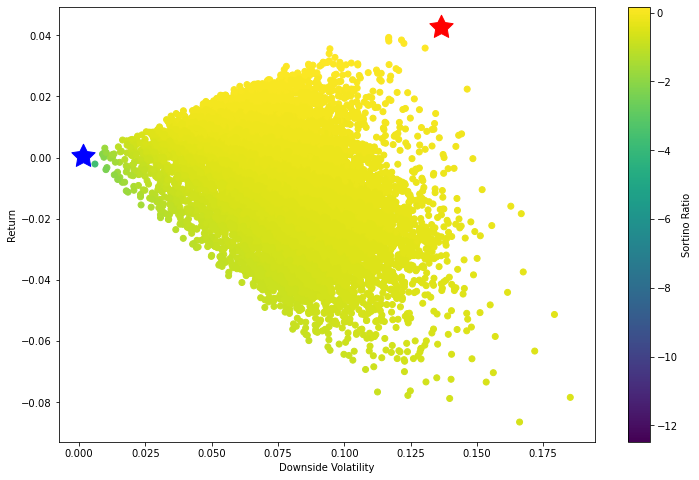

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Downside SD'],y=result['Mean'],c=result['Sortino'],cmap='viridis')
plt.colorbar(label='Sortino Ratio')
plt.xlabel('Downside Volatility')
plt.ylabel('Return')

#plt.title('Maximum Sortino Ratio - Auto Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Sortino[1],Max_Sortino[0],marker=(5,1,0),color='r',s=600)
plt.scatter(Min_DSD[1],Min_DSD[0],marker=(5,1,0),color='b',s=600)

plt.show()

In [19]:
# Portfolio with the maximum Sortino Ratio
w_raw = [0.4208, 0.0081, 0.0708, 0.0560, 0.0270, 0.0556, 0.0698, 0.0977, 0.1942]
#w_eigen = [i * 100 for i in w_raw]
print(w_raw)

w_2 = pd.DataFrame(w_raw, index = ['MARUTI.NS', 'TATAMOTORS.NS', 'M&M.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS', 
         'HEROMOTOCO.NS', 'BALKRISIND.NS', 'BHARATFORG.NS', 'ASHOKLEY.NS'])
w_2.columns = ['weights']
w_2

[0.4208, 0.0081, 0.0708, 0.056, 0.027, 0.0556, 0.0698, 0.0977, 0.1942]


weights
MARUTI.NS       0.4208
TATAMOTORS.NS   0.0081
M&M.NS          0.0708
BAJAJ-AUTO.NS   0.0560
EICHERMOT.NS    0.0270
HEROMOTOCO.NS   0.0556
BALKRISIND.NS   0.0698
BHARATFORG.NS   0.0977
ASHOKLEY.NS     0.1942

In [20]:
# Portfolio with the maximum Sharpe Ratio
w_raw = [0.0472, 0.0151, 0.0914, 0.2029, 0.0102, 0.0294, 0.3659, 0.0530, 0.1849]
#w_eigen = [i * 100 for i in w_raw]
# print(w_raw)

w_1 = pd.DataFrame(w_raw, index = ['MARUTI.NS', 'TATAMOTORS.NS', 'M&M.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS', 
         'HEROMOTOCO.NS', 'BALKRISIND.NS', 'BHARATFORG.NS', 'ASHOKLEY.NS'])
w_1.columns = ['weights']
w_1

weights
MARUTI.NS       0.0472
TATAMOTORS.NS   0.0151
M&M.NS          0.0914
BAJAJ-AUTO.NS   0.2029
EICHERMOT.NS    0.0102
HEROMOTOCO.NS   0.0294
BALKRISIND.NS   0.3659
BHARATFORG.NS   0.0530
ASHOKLEY.NS     0.1849

In [21]:
# Portfolio with maximum Calmar Ratio
w_raw = [0.3286, 0.0050, 0.0108, 0.0961, 0.1153, 0.1385, 0.2649, 0.0205, 0.0203]
w_3 = pd.DataFrame(w_raw, index = ['MARUTI.NS', 'TATAMOTORS.NS', 'M&M.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS', 
         'HEROMOTOCO.NS', 'BALKRISIND.NS', 'BHARATFORG.NS', 'ASHOKLEY.NS'])
w_3.columns = ['weights']
w_3

weights
MARUTI.NS       0.3286
TATAMOTORS.NS   0.0050
M&M.NS          0.0108
BAJAJ-AUTO.NS   0.0961
EICHERMOT.NS    0.1153
HEROMOTOCO.NS   0.1385
BALKRISIND.NS   0.2649
BHARATFORG.NS   0.0205
ASHOKLEY.NS     0.0203

In [23]:
frames = [w_1, w_2, w_3]
  
result_1 = pd.concat(frames,axis=1)
#result.rename(columns={"weights": "HRP", "weights": "HERC", "weights": "EIGEN"}, inplace=True)
df_port = result_1.set_axis(['Sharpe Ratio', 'Sortino Ratio', 'Calmar Ratio'], axis=1, inplace=False)
#df3 =df3/100
display(df_port)

Sharpe Ratio  Sortino Ratio  Calmar Ratio
MARUTI.NS            0.0472         0.4208        0.3286
TATAMOTORS.NS        0.0151         0.0081        0.0050
M&M.NS               0.0914         0.0708        0.0108
BAJAJ-AUTO.NS        0.2029         0.0560        0.0961
EICHERMOT.NS         0.0102         0.0270        0.1153
HEROMOTOCO.NS        0.0294         0.0556        0.1385
BALKRISIND.NS        0.3659         0.0698        0.2649
BHARATFORG.NS        0.0530         0.0977        0.0205
ASHOKLEY.NS          0.1849         0.1942        0.0203

Text(0.5, 1.0, 'Portfolio with Max Calmar Ratio')

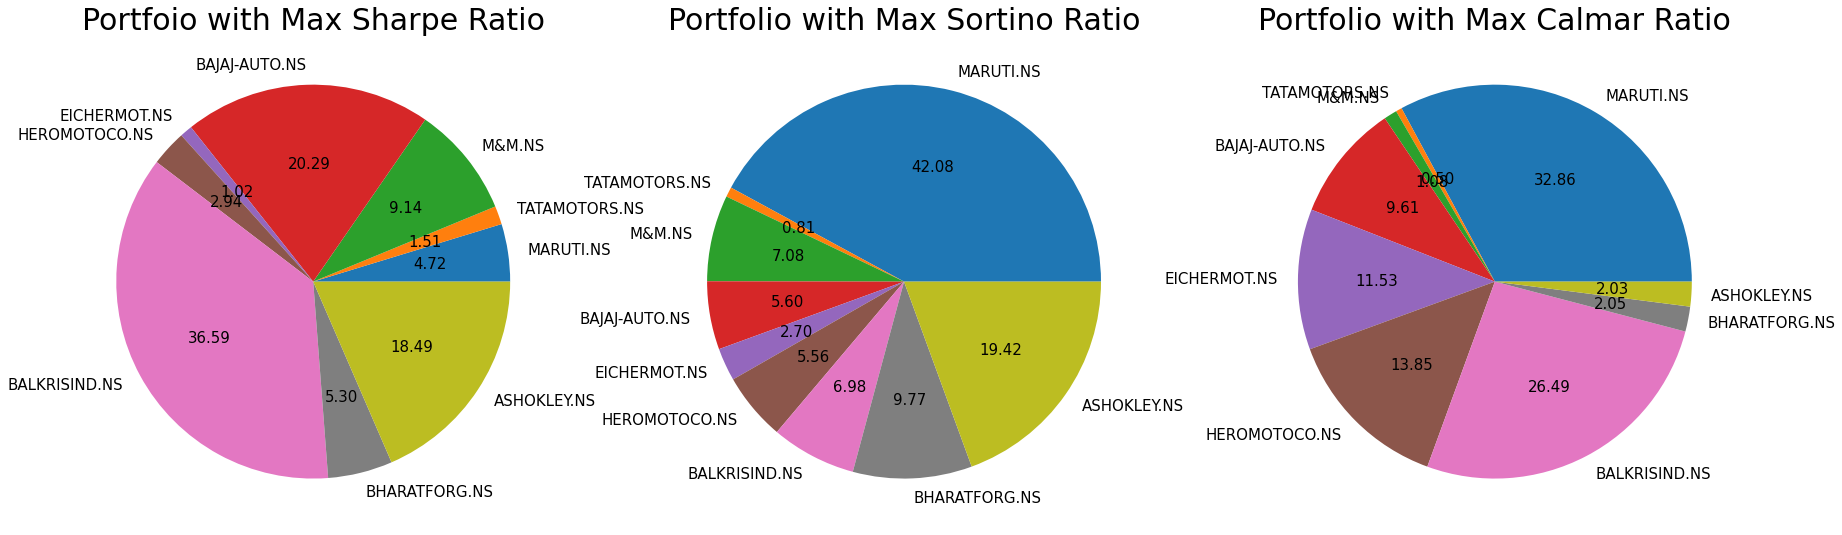

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,20))
ax1.pie(df_port.iloc[:,0], labels= df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax1.set_title('Portfoio with Max Sharpe Ratio',fontsize = 30)
ax2.pie(df_port.iloc[:,1], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax2.set_title('Portfolio with Max Sortino Ratio',fontsize = 30)
ax3.pie(df_port.iloc[:,2], labels=df_port.index, autopct='%.2f', textprops={'fontsize': 15});
ax3.set_title('Portfolio with Max Calmar Ratio',fontsize = 30)


#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

In [25]:
df_training.shape

(987, 9)

In [26]:
Insample_Result=pd.DataFrame(np.dot(df_training, np.array(df_port)), \
                             columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_training.index)
OutOfSample_Result=pd.DataFrame(np.dot(df_test,np.array(df_port)), \
                                columns=['Max Sharpe Ratio Portfolio', 'Max Sortino Ratio Portfolio', 'Max Calmar Ratio Portfolio'], index = df_test.index)

In [27]:
Insample_Result.head(20)

Max Sharpe Ratio Portfolio  Max Sortino Ratio Portfolio  \
Date                                                                  
2017-01-03                    0.003967                     0.002810   
2017-01-04                    0.008622                     0.006200   
2017-01-05                    0.010458                     0.014720   
2017-01-06                   -0.001591                    -0.000247   
2017-01-09                   -0.003093                     0.000561   
2017-01-10                    0.003465                     0.005229   
2017-01-11                    0.008273                     0.012346   
2017-01-12                   -0.003395                    -0.003141   
2017-01-13                   -0.009797                    -0.008370   
2017-01-16                    0.003317                     0.000352   
2017-01-17                    0.028605                     0.005871   
2017-01-18                    0.003579                     0.003731   
2017-01-19                   -0.005113                     0.002530   
2017-01-20                   -0.016720                    -0.013062   
2017-01-23                    0.005007                     0.006277   
2017-01-24                    0.014507                     0.013346   
2017-01-25                    0.002665                     0.005471   
2017-01-27                    0.016575                     0.021312   
2017-01-30                   -0.001304                    -0.003000   
2017-01-31                   -0.010693                    -0.007008   

            Max Calmar Ratio Portfolio  
Date                                    
2017-01-03                    0.003295  
2017-01-04                    0.000178  
2017-01-05                    0.016322  
2017-01-06                   -0.001391  
2017-01-09                    0.000935  
2017-01-10                    0.003038  
2017-01-11                    0.010461  
2017-01-12                   -0.001049  
2017-01-13                   -0.012462  
2017-01-16                   -0.000510  
2017-01-17                    0.021643  
2017-01-18                    0.000821  
2017-01-19                    0.000356  
2017-01-20                   -0.013601  
2017-01-23                    0.005489  
2017-01-24                    0.008576  
2017-01-25                    0.009917  
2017-01-27                    0.011120  
2017-01-30                   -0.002627  
2017-01-31                   -0.007382

<AxesSubplot:xlabel='Date', ylabel='Return'>

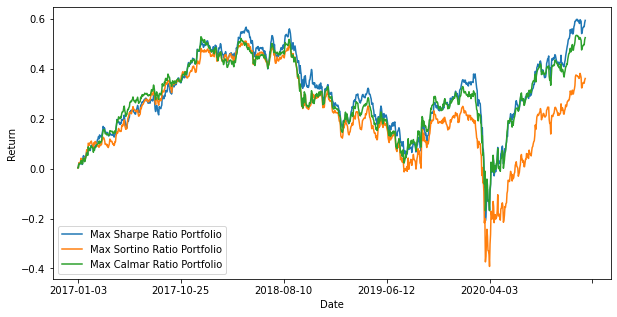

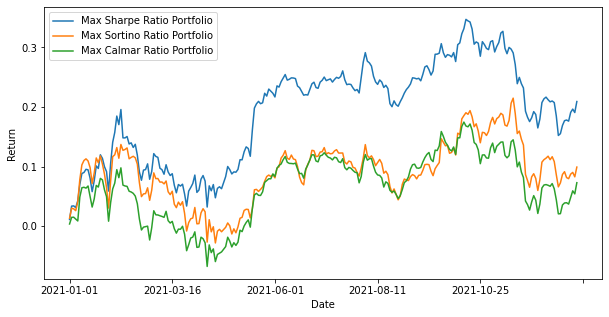

In [28]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [29]:
ret_insample=Insample_Result.mean() * 252
ret_insample

Max Sharpe Ratio Portfolio     0.151772
Max Sortino Ratio Portfolio    0.092299
Max Calmar Ratio Portfolio     0.134098
dtype: float64

In [30]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

Max Sharpe Ratio Portfolio     0.212625
Max Sortino Ratio Portfolio    0.100905
Max Calmar Ratio Portfolio     0.074287
dtype: float64